In [30]:
import pandas as pd
import numpy as pd
from sklearn.datasets import load_breast_cancer


In [31]:
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [32]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from pandas import Series, DataFrame


X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                random_state=66)
training_accuracy = [] # 모델에 대한 적합도 판단 - train set
test_accuracy = [] # 모델에 대한 정확도 판단 - test set

#1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)


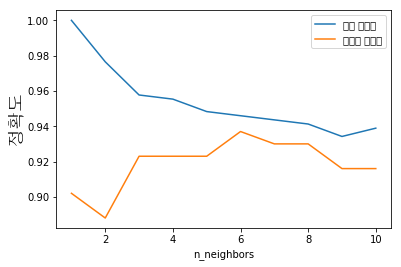

In [34]:
for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    #테스트 세트 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))

data=DataFrame(data={'적합성': training_accuracy,'정확성':test_accuracy})

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\H2GPRM.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도",fontproperties=fontprop)
plt.xlabel("n_neighbors")
plt.legend()

In [41]:
from sklearn.neighbors import KNeighborsRegressor
import mglearn
import numpy as np
X, y = mglearn.datasets.make_wave(n_samples=40)

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [43]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [44]:
reg.score(X_test,y_test)

0.8344172446249604

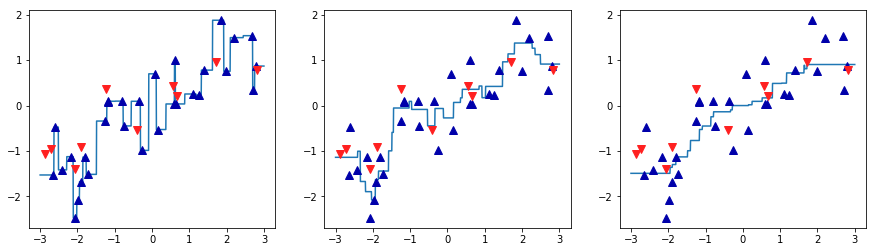

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) 
    # weights='uniform' 일 경우 np.mean() 함수를 사용해 단순 평균 계산
    # 'distance' 일 경우 가중치 부여
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    